Step 1

1.  Supervised learning is a way to create artificial inelligence where a computer is given input data along with expected outputs. The computer then tries to find any functions/patterns relationiships between the input data to the expected output data. Then to predict the new outputs when given new inputs. The 2 goals we are working towards would be classification and regression. To classify data we have to use a decision tree classifier while regressing data we use KNN regressor. This is beacuse classification we do not need to scale the data but for regression we do as the classification is not sensetive to high variance. This is beacuse in KNN the points are very sensetive as if one data point is high variance can change significantly to high input data so a scaler is needed to make sure output is accurate. Classification is a process where the machine finds function which helps divide the data set into classes based on the parrameters. During classification, the machine is trained on training data set and then categorizes the data into different classes. While regression on the other hand uses real numbers isntead of classes. For example, for classification, classes such as male, female and non-binary ect may be used as classes when predicting the gender of a person but in regression we would use things such as length of hair instead of the classes and  have real numbers instead of classes.

2. linear regression will give us a model with B0 which is  the baseline for starting any prediction along with Bj will give us some insight into the problem such as trends. E.g a negative Bj means that for every unit of Xj, the prediction will reudce by the amount if Bj vice verse. With this data we can get insigiht to how a single parameter can affect the final prediction

3. Cross validation process used for obatining an honest esimate of the perfformance of the models. This is done by splitting the input data into subsets using the leavin and hold out approach where leave in are instances that do not belong to the fold while the hold out is the instances that belong to the fold, and creating models with them, after all the models are fitted into the fold, it then comparing the ouput data with the original model and checking how honest/accurate it is. Normally the amount of folds is set to 10. One drawback is computationally very expensive. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.metrics import make_scorer, confusion_matrix, precision_recall_fscore_support, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.datasets import make_friedman1

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

water_quality_sites = pd.read_csv("water_quality_sites.csv")
site_vist = pd.read_csv("site_visits.csv")
measurements = pd.read_csv("measurements.csv")

measurements.info()
site_vist.info()
water_quality_sites.info()

##measurements has 1 float and 2 objects with no null
##site_vist has 1 int 64 and 5 objects 
## water_quality_site has 3 float, 2 int and 3 object

##Due to the fact that we already have the site ID we do not need other variables that identift where the site is such as altitude, catchment area, height longitude and lattidture are not needed. 
## Other objects such as scientist or Verified by may not be used for moddeling but ingeneral, Site_ID and value are needed for moddeling.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389721 entries, 0 to 389720
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   checksum     389721 non-null  object 
 1   Measurement  389721 non-null  object 
 2   Value        389721 non-null  float64
dtypes: float64(1), object(2)
memory usage: 8.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187 entries, 0 to 29186
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    29187 non-null  object
 1   SiteID       29187 non-null  object
 2   Day of Week  29187 non-null  int64 
 3   Scientist    29187 non-null  object
 4   Verified By  29187 non-null  object
 5   checksum     29187 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column            Non-Null Cou

In [2]:

Measurement_Pivot = measurements.pivot_table(index = 'checksum', columns='Measurement', values = 'Value')
Measurement_Pivot.dropna(inplace= True) ##once we merge the data, the Na's appear so we get rid of them
Measurement_Pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13219 entries, 0009f4e7ab7d5d41c2280b7f5398e952 to fff256249dd2764727b920b0c0da8cdd
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absorbance Coefficient        13219 non-null  float64
 1   Ammonia                       13219 non-null  float64
 2   Cloud Cover                   13219 non-null  float64
 3   Dissolved Oxygen Saturation   13219 non-null  float64
 4   Dissolved Reactive Phosphate  13219 non-null  float64
 5   E Coli                        13219 non-null  float64
 6   Electrical Conductivity       13219 non-null  float64
 7   Nitrate + Nitrite             13219 non-null  float64
 8   Ring Temp                     13219 non-null  float64
 9   Total Nitrogen                13219 non-null  float64
 10  Total Phosphate               13219 non-null  float64
 11  Turbidity                     13219 non-null  float64
 12  Water T

Absorbance Coefficient  Ammonia  Dissolved Oxygen Saturation  E Coli  \
0                        0.62      3.0                        103.8    21.3   
1                        6.10      2.0                         99.2    90.7   
2                       19.35     17.0                         93.9   157.6   
3                        3.50     19.0                        100.8   344.8   
4                        0.06      1.0                        101.7     6.3   
...                       ...      ...                          ...     ...   
13214                    1.60      3.0                        101.7     0.0   
13215                    2.10     10.0                        106.5    76.6   
13216                    3.50     14.0                        100.7    63.1   
13217                    2.60      8.0                         96.8   365.4   
13218                    4.20      8.0                        103.3   686.7   

       Electrical Conductivity  Total Nitrogen  Total Phosphate  Turbidity  \
0                         60.4            70.0              5.0       1.20   
1                        121.5            75.0              8.0       1.60   
2                        205.0           695.0             45.0       8.90   
3                        143.0           778.0             10.0       1.36   
4                        121.5            64.0              3.0       0.45   
...                        ...             ...              ...        ...   
13214                     69.8           171.0             18.0       4.50   
13215                     97.1           603.0             26.0       1.14   
13216                    368.0           452.0             21.0       0.68   
13217                     90.0           472.0              9.0       1.05   
13218                    117.9           428.0             34.0       3.10   

       Water Temp    pH SiteID        Region                      Name  \
0             6.4  7.53    TK6        Tekapo        Waitaki at SH1 Br.   
1            10.8  7.66    WH1     Whangarei  Waipapa at Forest Ranger   
2            10.9  7.26    AK2      Auckland    Rangitopuni at Walkers   
3            13.9  7.36    HM6      Hamilton  Ohinemuri at Karangahake   
4            19.8  8.22    RO6       Rotorua     Waikato at Reids Farm   
...           ...   ...    ...           ...                       ...   
13214         7.4  7.83    HV4  Havelock Nth  Ngaruroro at Kuripapango   
13215        16.9  7.22    RO5       Rotorua     Rangitaiki at Te Teko   
13216        11.1  8.15    WA7      Wanganui      Manawatu at Weber Rd   
13217        15.0  7.45    TK1        Tekapo     Opihi at Grassy Banks   
13218        15.9  7.81    WN3    Wellington    Ruamahanga at Waihenga   

        Longitude   Latitude             Timestamp  
0      171.100247 -44.928763  2005-06-16T11:55:00Z  
1      173.687917 -35.275205  2011-07-18T10:50:00Z  
2      174.617716 -36.746082  2009-07-22T11:15:00Z  
3      175.715083 -37.416591  2012-05-14T12:45:00Z  
4      176.077144 -38.677527  2008-03-11T11:20:00Z  
...           ...        ...                   ...  
13214  176.330403 -39.381692  2013-09-03T11:30:00Z  
13215  176.799560 -38.041587  2012-12-05T14:00:00Z  
13216  176.111484 -40.242260  2010-05-19T12:15:00Z  
13217  171.290382 -44.263797  2012-02-12T10:00:00Z  
13218  175.439426 -41.197160  2011-12-07T12:00:00Z  

[13219 rows x 16 columns]

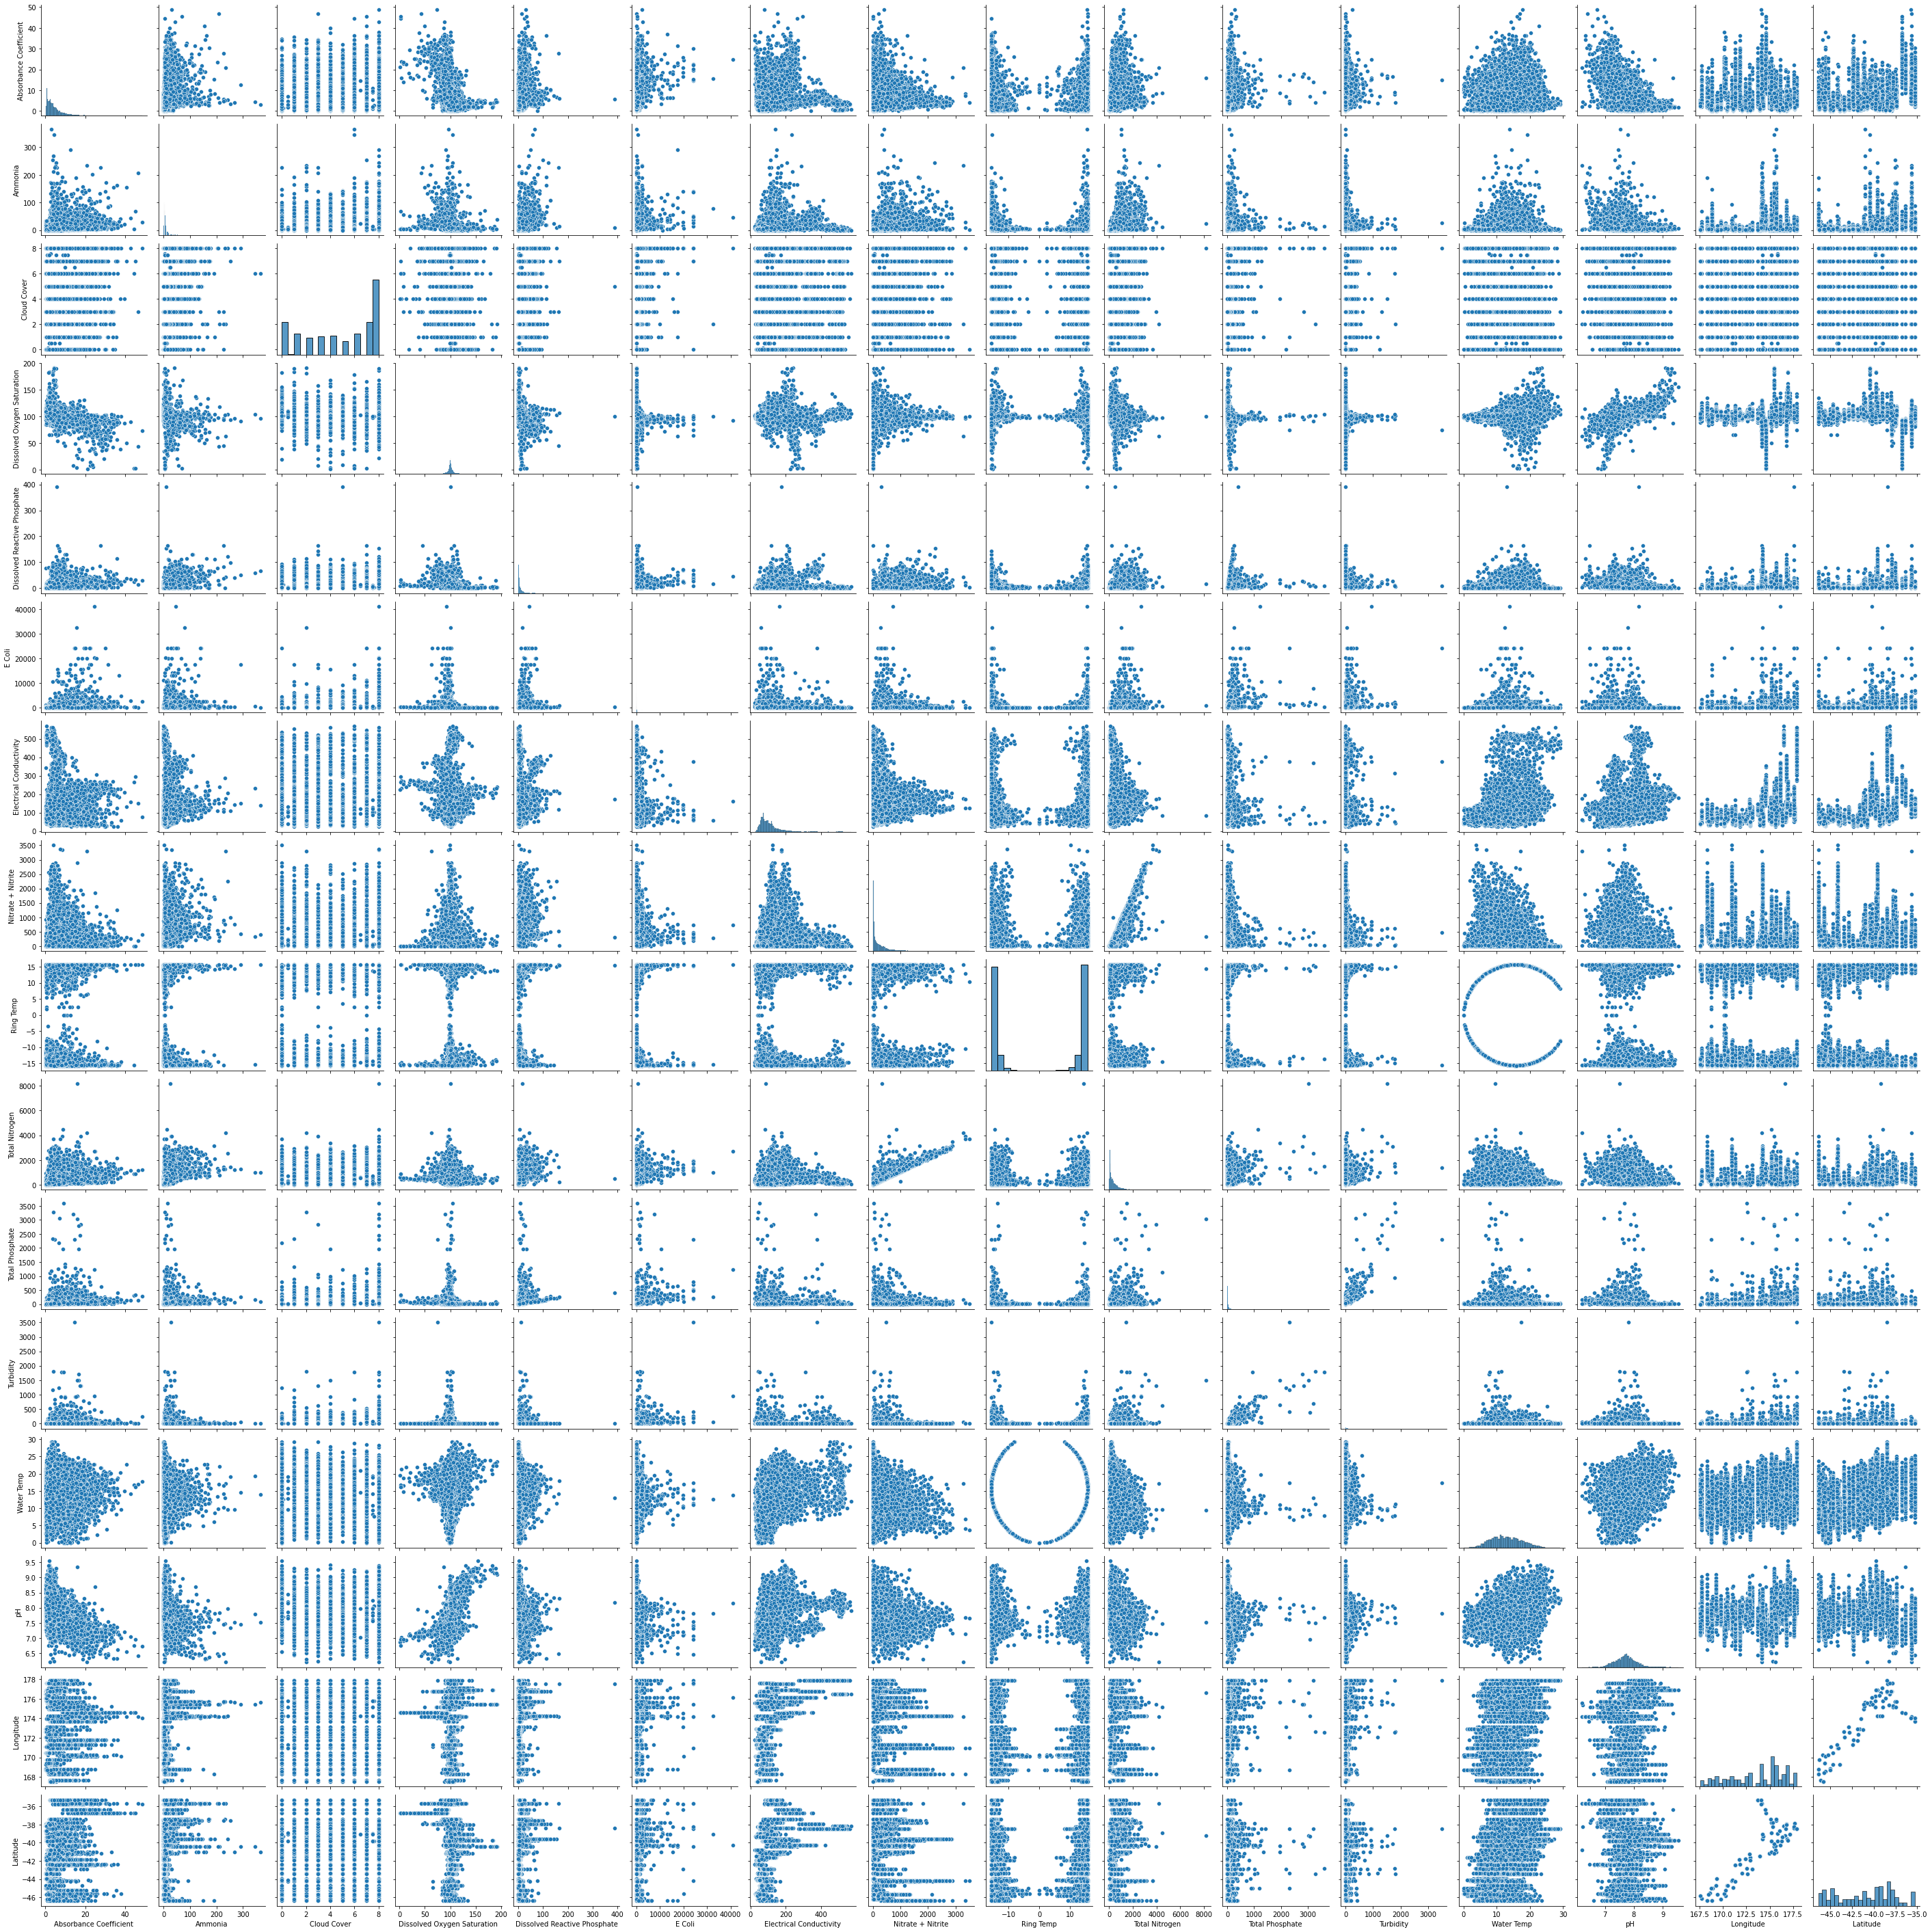

In [3]:

df1 = pd.merge(water_quality_sites, site_vist )
df2 = pd.merge (Measurement_Pivot, df1, on = 'checksum')

df2.drop(columns = ['checksum','Altitude', 'Catchment area', 'Catchment height', 'Day of Week', 'Scientist', 'Verified By'], inplace = True)
sns.pairplot(df2)
df2.drop(columns = ['Cloud Cover', 'Nitrate + Nitrite', 'Dissolved Reactive Phosphate', 'Ring Temp'], inplace = True)
##sns.pairplot(df2)
df3 = df2[df2["E Coli"] >= 550]
dfgroupby = df3.groupby(['SiteID', 'Region', 'Name', 'Longitude', 'Latitude' ]).count()
final = dfgroupby[['E Coli' ]]
final = final.sort_values(by = 'E Coli', ascending= False)
final.to_csv("final.csv")
df2


As seen on the pairplot there a few columns that are deemed unnecassary, such as total nitrate and nitrate and nitrite where we already have one so we do not need the other. Along with one of the phosophorus. Otherrthings that are just stand out different in the data inc cloud cover and ring temp where just looks differencec from the other data points, this usually occurs when the data is bull. Removing similar attributes where on the pairplot is a linear relationship means that the data is similar therefore one of the columns is not needed asshown above where total nitrate and nitrate + nitrite has a linear relationship so thhe values are very similar so one can be removed.

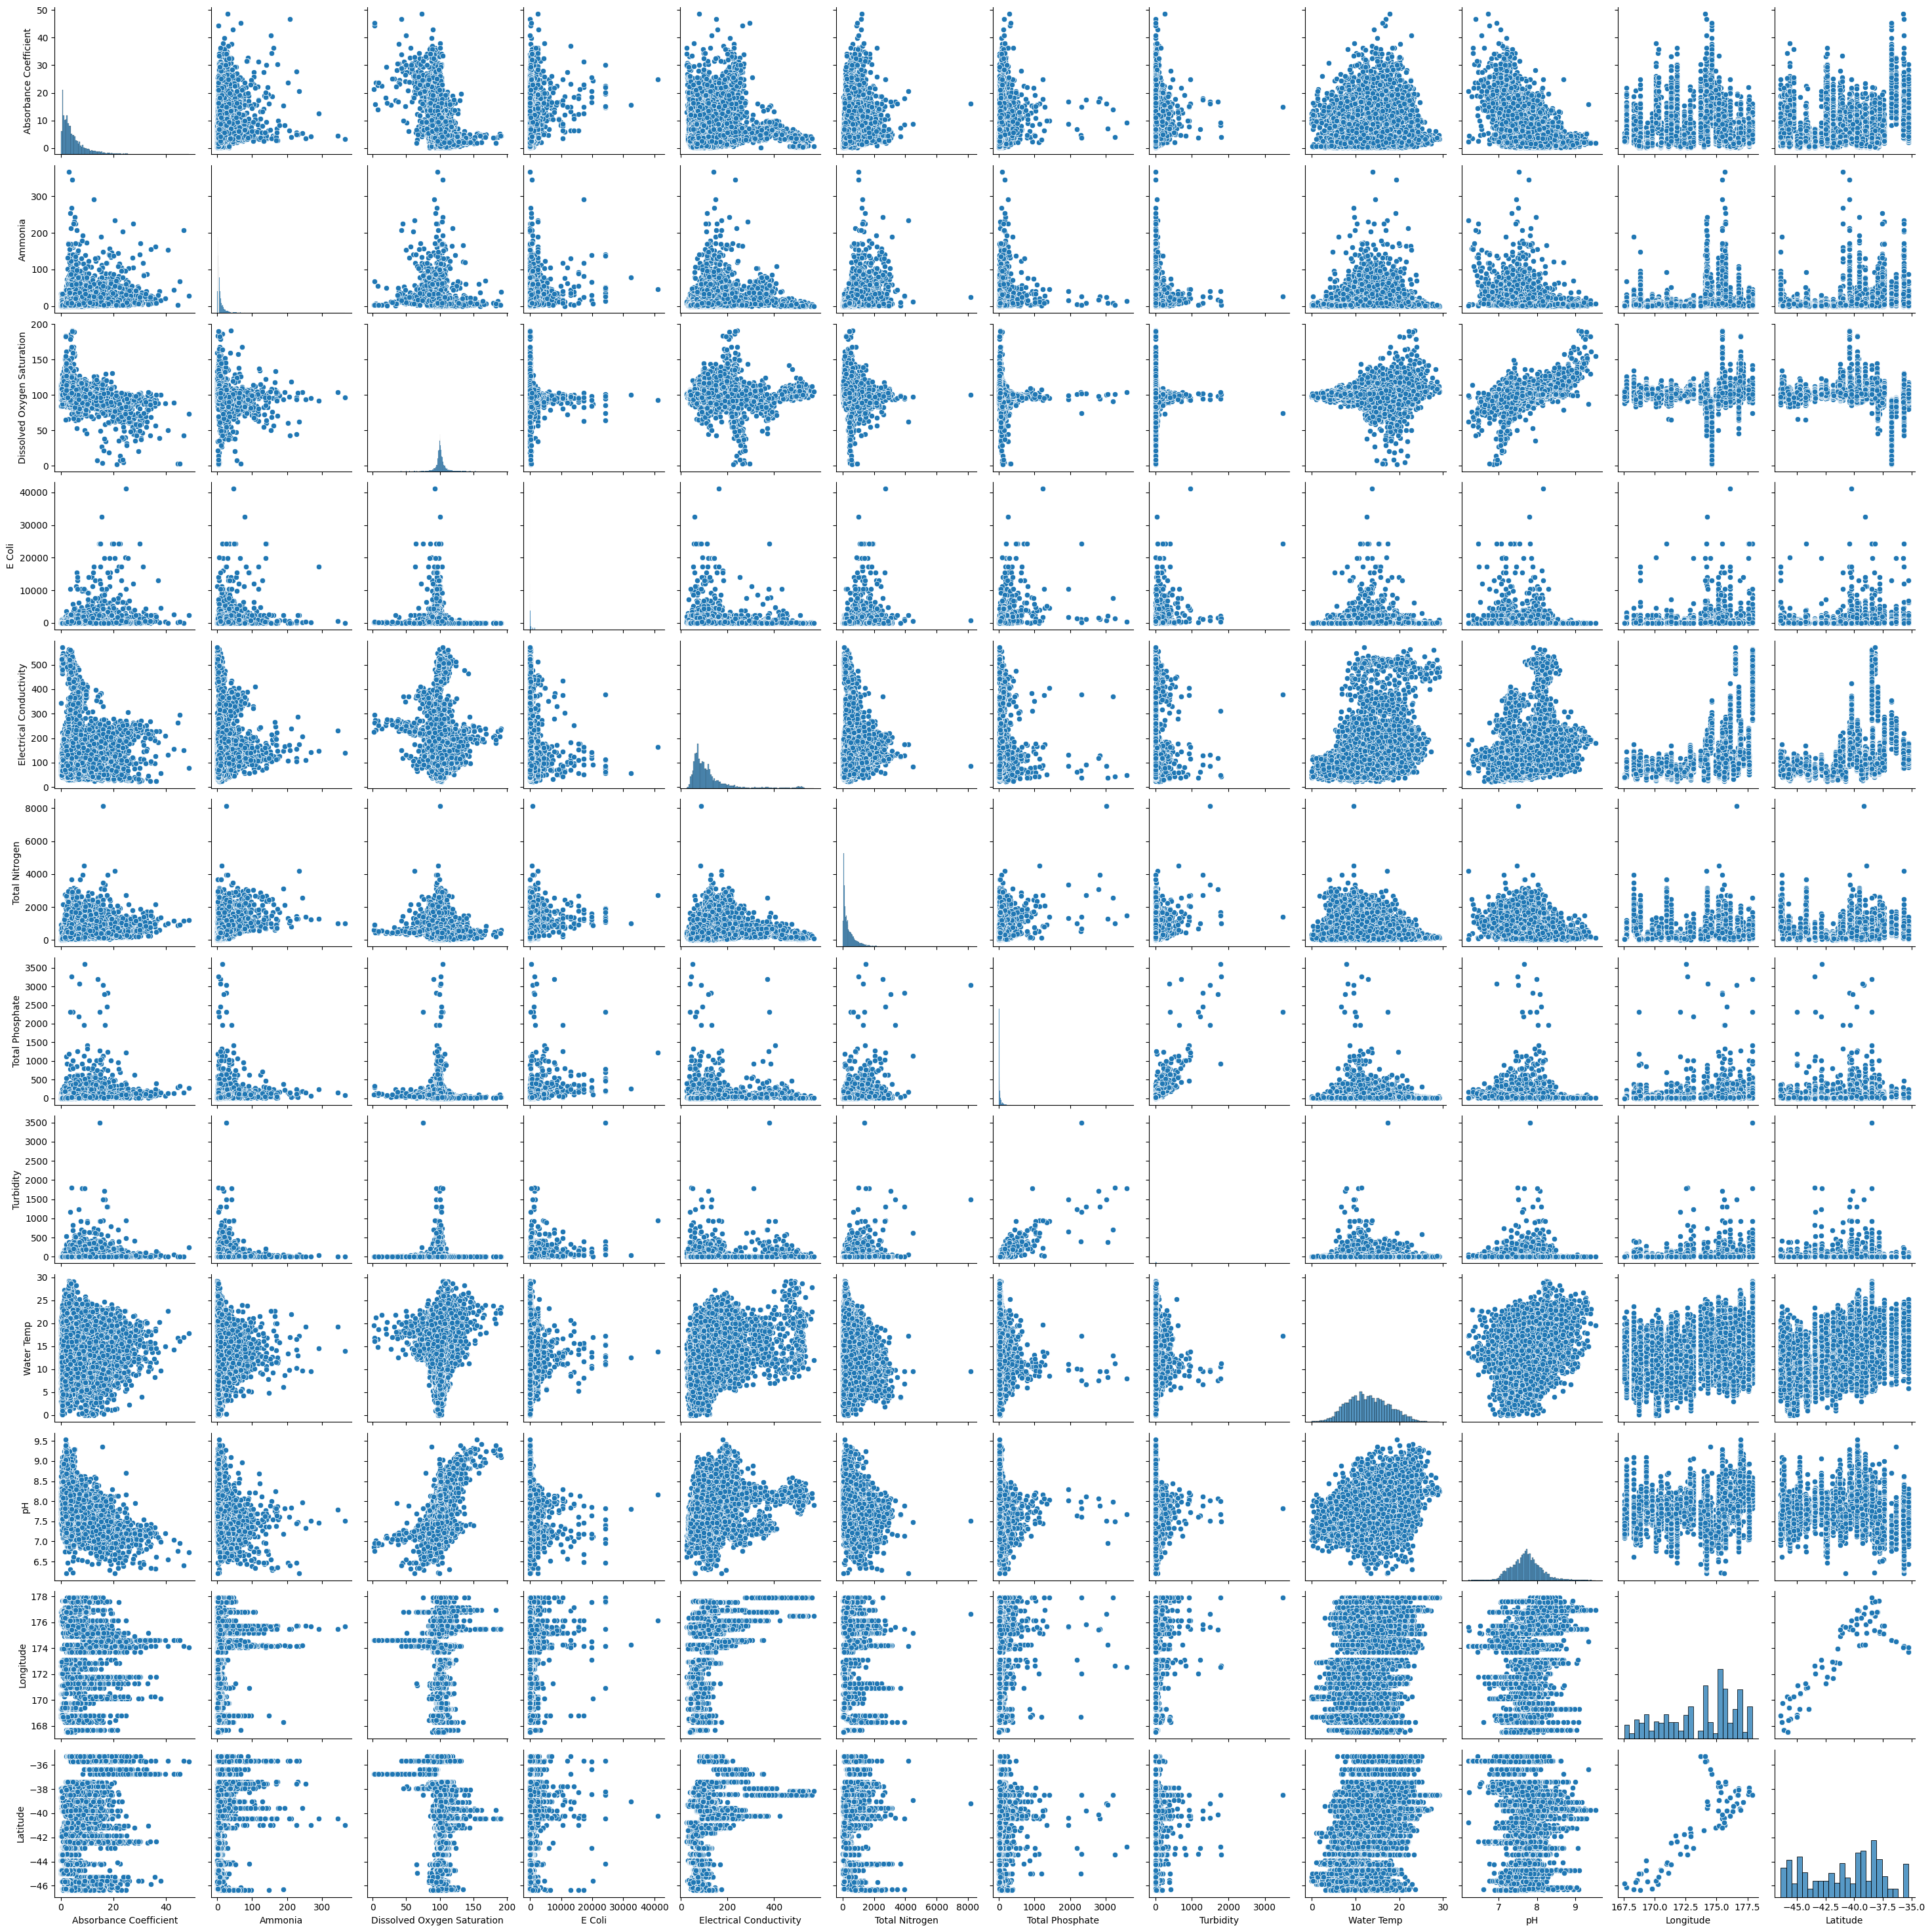

In [4]:
sns.pairplot(df2)

In [5]:


from sklearn.metrics import r2_score
df4 = df2.drop(columns = ['Region', 'Name', 'Longitude', 'Latitude', 'Timestamp'])
df4['SiteID'] = df4['SiteID'].str.replace('[0-9]', '', regex=True)
df4 =pd.get_dummies(df4, columns = ['SiteID'])
df4
target = 'pH'
X = df4.drop(columns=[target]).to_numpy()
t = df4[target].to_numpy()
feature_names = df4.drop(columns=[target]).columns.values
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7) 
model1 = LinearRegression().fit(X, t)
feature_names = df4.drop(columns=target).columns.values
model_details = pd.DataFrame({
    'input_variable' : np.hstack([ 'intercept', feature_names ]),
    'coefficient' : np.hstack([ model1.intercept_, model1.coef_ ])
})
model_details

input_variable  coefficient
0                     intercept     5.653766
1        Absorbance Coefficient    -0.013601
2                       Ammonia    -0.001306
3   Dissolved Oxygen Saturation     0.018573
4                        E Coli     0.000006
5       Electrical Conductivity     0.001229
6                Total Nitrogen    -0.000072
7               Total Phosphate     0.000032
8                     Turbidity     0.000084
9                    Water Temp     0.012635
10                    SiteID_AK     0.097800
11                    SiteID_AX     0.150896
12                    SiteID_CH     0.090000
13                    SiteID_DN    -0.118917
14                    SiteID_GS     0.105291
15                    SiteID_GY    -0.086194
16                    SiteID_HM    -0.202694
17                    SiteID_HV     0.247488
18                    SiteID_NN     0.117229
19                    SiteID_RO    -0.168094
20                    SiteID_TK     0.051633
21                    SiteID_TU    -0.045546
22                    SiteID_WA     0.081952
23                    SiteID_WH    -0.173154
24                    SiteID_WN    -0.147690

Some features may be that some features such as ecoli, electrical conductivity, water temp ect is poistively correlated with pH level meaning that as cloud cover increases pH also increases

While other features such as amonia, total nitrogen ect are negatively corregalted with pH meaning that with every increase in amonia for example pH will decrease. Sometyhing interesting about amonia and pH was that in isolation amonia increases the pH scale. But in this case there is something else affecting amonia and pH where instead of increasing pH actually decreases and this can be researched furthur into.

 r2 is 0.6845212960812828
 r2 is 0.7600813277699789
 r2 is 0.7805561450545702
 r2 is 0.7980144795845707
 r2 is 0.8045174069708976
 r2 is 0.8022469956102561
 r2 is 0.7965267706556228
 r2 is 0.7859620078537138
 r2 is 0.7627405144078627
 r2 is 0.7268568181356215
 r2 is 0.6739482331695394
 r2 is 0.5991936806203774
 r2 is 0.5207224693248288


<AxesSubplot:xlabel='N size', ylabel='r^2'>

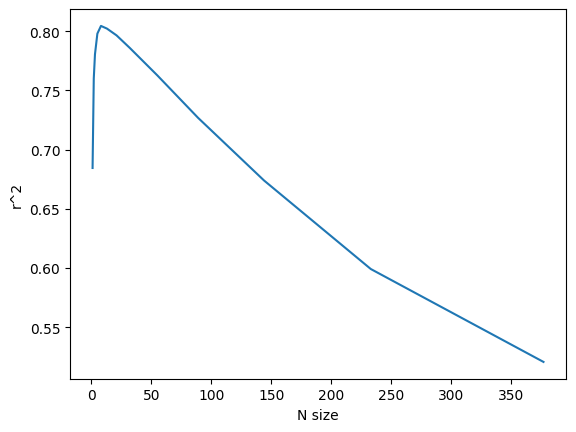

In [6]:
knnValues = []
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train) ## we call fit_transform() to first work out the scaling parameters (mu and sigma), and THEN perform the scaling!
Z_test = scaler.transform(X_test) ## notice that we call transform() this time - we have already worked out the scaling parameters from the training data!
nieghbour = [1,2,3,5,8,13,21,32,55,89,144,233,377]
for n in nieghbour:
    knn = KNeighborsRegressor(n_neighbors = n).fit(Z_train, t_train)
    knnTest = knn.predict(Z_test)
    rsq2 = r2_score(t_test, knnTest)
    print( " r2 is " + str(rsq2))
    knnValues.append([n, rsq2])
    
knnValues = np.array(knnValues)
plot = pd.DataFrame({"N size": knnValues[:,0], "r^2": knnValues[:,1]})
sns.lineplot(data=plot, x="N size", y= "r^2")

##at neightbours = 8 r^2 is at its current highest.

In [7]:
rs1array = []   
val_list = [2,3,5,8,13,21,32,55,89,144,233,377]
for  m  in val_list:
    mdlDTR = DecisionTreeRegressor(min_samples_split = m).fit(X_train, t_train)
    ytest = mdlDTR.predict(X_test)
    rs1array.append([m, r2_score(t_test, ytest)])

print(rs1array)

[[2, 0.659667698933741], [3, 0.6530312829596537], [5, 0.6755954403888823], [8, 0.689367789614965], [13, 0.7068492919161552], [21, 0.7215005859255577], [32, 0.7279006809820807], [55, 0.7415734238387479], [89, 0.7417209540513099], [144, 0.7206471208308054], [233, 0.6864481128564832], [377, 0.6529784443682927]]


[[  2.           0.6596677 ]
 [  3.           0.65303128]
 [  5.           0.67559544]
 [  8.           0.68936779]
 [ 13.           0.70684929]
 [ 21.           0.72150059]
 [ 32.           0.72790068]
 [ 55.           0.74157342]
 [ 89.           0.74172095]
 [144.           0.72064712]
 [233.           0.68644811]
 [377.           0.65297844]]


<AxesSubplot:xlabel='minsplit', ylabel='r^2'>

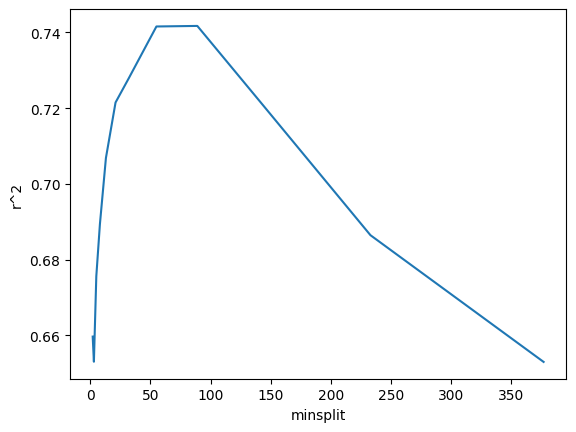

In [8]:
rs1array = np.array(rs1array)
plot_data = pd.DataFrame({
    'minsplit' : rs1array[:, 0],
    'r^2' : rs1array[:, 1]
})

print(rs1array)
sns.lineplot(data=plot_data, x='minsplit', y='r^2')


from 0 to 55 the minsplit increases r^2 then after than for each minsplit R^2 slowly declines.

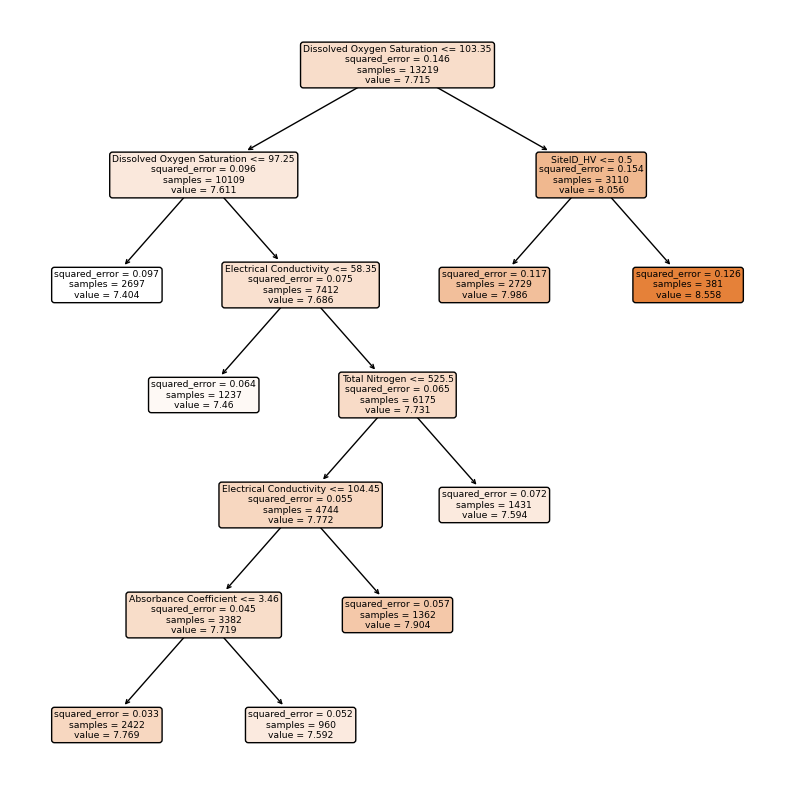

In [9]:
tree = DecisionTreeRegressor( random_state=0,min_samples_split=3000)

tree.fit(X, t)
plt.figure(figsize=(10,10))
plot_tree(tree, rounded=True, filled=True, feature_names=feature_names);


From the decision tree above, we can see that the biggest split is dissolved Oxygen Saturation. This matchwes the features in question 3c where dissolved Oxygen Saturation had the highest change for pH. The furthurer you go down on the tree the more specific number you get and the numbers on the right are always bigger than the values on the keft as it goes down, it sores by not just dissolved oxygen saturation but also electrical conductivity, total nitrogen, and absorbent coefficient. Along with the region also playing an affect where Havelock Nth - SiteID_HV will have higher pH then annything in the left and high dissolved oxygen saturation and being in Havelock nth will on average have higher pH then other places. This may be because there tends to be more green stone in Havlock Nth and that could afect the pH level of the water.

In [10]:
def cleanup_cv_results(cv_results, model_name='model', scale_name='scale'):
    import re
    
    ## remove the "param_"  and "param_model__" prefixes from columns
    r = re.compile(f"param_({model_name}__)*")
    cleaned_names = cv_results.rename(columns=lambda x: r.sub('', x))

    ## identify all the columns that are not the per-split cross validation scores
    r = re.compile(f"split.+_test_score")
    header_cols = [ c for c in cleaned_names.columns.values if not r.match(c) ]
    
    ## return the long version of the data
    return cleaned_names.melt(id_vars=header_cols, var_name='split', value_name='score')

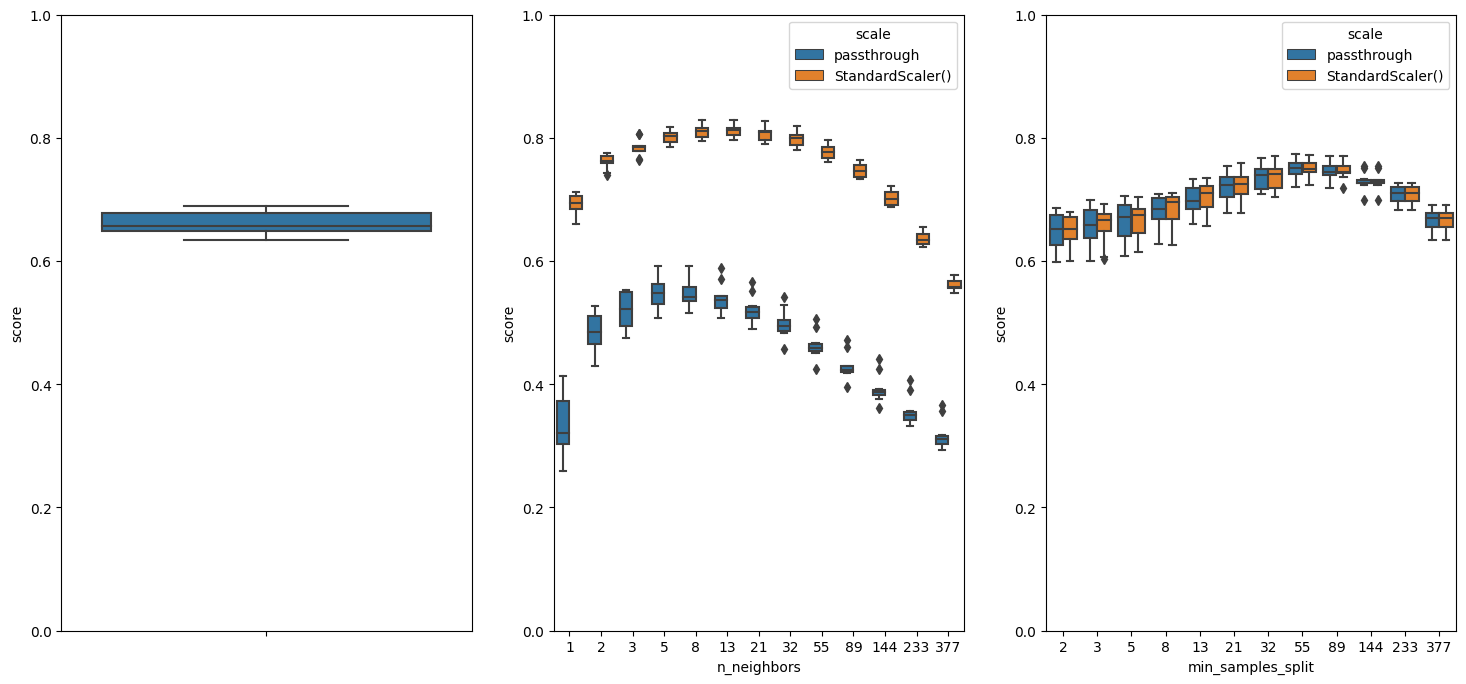

In [11]:
scale = StandardScaler()
lm = LinearRegression()
knn = KNeighborsRegressor()
CART = DecisionTreeRegressor()

all_k = [1,2,3,5,8,13,21,32,55,89,144,233,377]
all_k1 = [2,3,5,8,13,21,32,55,89,144,233,377]
lm_tune_grid = {
    'scale' : [ 'passthrough' ],
    'model' : [ lm ]
}

knn_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [ knn ],
    'model__n_neighbors' : all_k
}

Cart_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [CART ],
    'model__min_samples_split' : all_k1
}

cmp_tune_grid = [
    lm_tune_grid,
    knn_tune_grid,
    Cart_tune_grid
]
folds = KFold(n_splits=10, shuffle=True)
ml_pipe = Pipeline([ ('scale', 'passthrough'), ('model', DummyRegressor()) ])

cv = GridSearchCV(ml_pipe, cmp_tune_grid, cv=folds, n_jobs=-1)
cv.fit(X, t)
clean = cleanup_cv_results(pd.DataFrame(cv.cv_results_))
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
sns.boxplot(data=clean[clean['model']==lm], y='score', ax=axs[0])
sns.boxplot(data=clean[clean['model']==knn], x='n_neighbors', y='score', hue='scale', ax=axs[1])
sns.boxplot(data=clean[clean['model']==CART], x='min_samples_split', y='score', hue='scale', ax=axs[2])
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))
axs[2].set(ylim=(0, 1))
plt.show()


As shown in the graphs above, K N neighbours with 8 neighbors and a standard scaler reaches the highest r^2 values above the linear regression and Decision tree regressor. This means that for this particular data set, KNN is the best perfromer. Others models such as Decision tree regressor with min smaple split of 55 (highest r squared) comes in second for accuracy with Linear regression coming in last. We meausre these very easy variables to see if there is correlation between other features. E.g Measureing E COli or nitrate might be harder than measuring pH. So if you could predict nitrate or E Coli from pH, it may be easier to asses water feaures. You can also find interesting features and correlation in the data such as ammonia decreasing pH which in basic chemsitry you were taught that ammonia increase pH. So what it tells us is that there is something else that might affect ammonia which will decrease the pH. As in a controlled area where only ammonia and pH are measured, ammonia will increase pH always. With data like this we are able to go furthur deeper for exmaples like pH and amonia.